<a href="https://colab.research.google.com/github/fatwaman/Learning_Python/blob/main/SpamEmail_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Load Libraries, Dataset and Cleaning Data

## 1.1 Import Necessary Libraries

In [ ]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## 1.2 Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Pengantar Data Mining/TB 2/data/spam.csv'

df = pd.read_csv(file_path, on_bad_lines='skip')

Mounted at /content/drive


In [ ]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FF00CC")]}
])
styled_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


## 1.3 Data Cleaning

### 1.3.1 Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### 1.3.2 Rename The Column

In [ ]:
# Rename the columns name
df.rename(columns = {'Category': 'category', 'Message': 'message'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### 1.3.3 Check Missing Values

In [ ]:
#checking missing values
df.isnull().sum()

,0
category,0
message,0


### 1.3.4 Check Duplicate Values

In [ ]:
#check duplicate values
df.duplicated().sum()

np.int64(415)

### 1.3.5 Remove Duplicate Values

In [ ]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

np.int64(0)

### 1.3.6 Shape of Dataset

In [ ]:
df.shape

(5157, 2)

# 2.EDA

Check Record per Attributes

In [ ]:
df['category'].value_counts()

,count
category,
ham,4516
spam,641


In [ ]:
df['message'].value_counts()

,count
message,
Rofl. Its true to its name,1
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",1
Ok lar... Joking wif u oni...,1
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
U dun say so early hor... U c already then say...,1
...,...
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,1
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,1
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,1


## 2.1 Percentage of Ham and Spam

In [ ]:
values = df['category'].value_counts()
total = values.sum()

percentage_ham = (values['ham'] /total) * 100
percentage_spam = (values['spam']/ total) *100

print('percentage of ham :' ,percentage_ham)
print('percentage of spam :' ,percentage_spam)

percentage of ham : 87.5702928058949
percentage of spam : 12.429707194105099


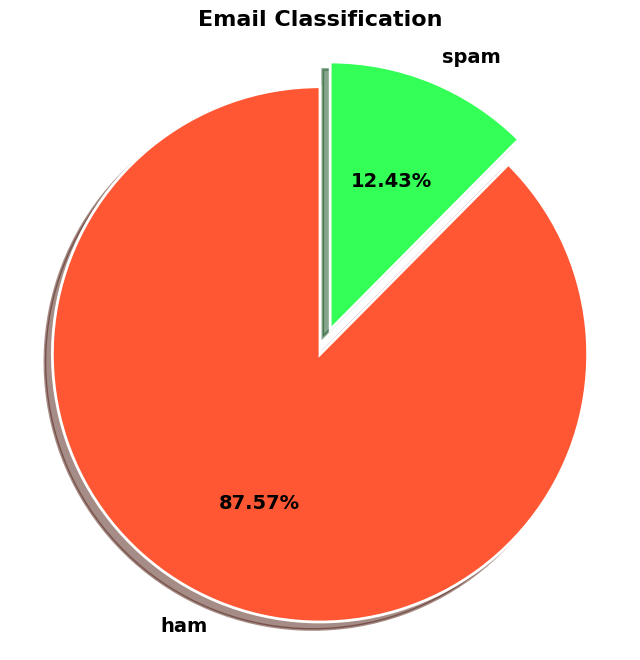

In [ ]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

As you see to the graph the percentage of ham is too high (87.37%) as compare to spam messages percentage. The data is imbalance, so we need to balancing that data.

## 2.2 Undersampling majority Class

To balance the data

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Misal: df adalah DataFrame Anda
df_majority = df[df['category'] == 'ham']
df_minority = df[df['category'] == 'spam']

# Undersample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # without replacement
                                   n_samples=len(df_minority), # match minority
                                   random_state=42)

# Gabungkan
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df = df_balanced
df['category'].value_counts()

,count
category,
spam,641
ham,641


Now the data balanced, we can show percentage after data has been balancing

In [ ]:
values = df['category'].value_counts()
total = values.sum()

percentage_ham = (values['ham'] /total) * 100
percentage_spam = (values['spam']/ total) *100

print('percentage of ham :' ,percentage_ham)
print('percentage of spam :' ,percentage_spam)

percentage of ham : 50.0
percentage of spam : 50.0


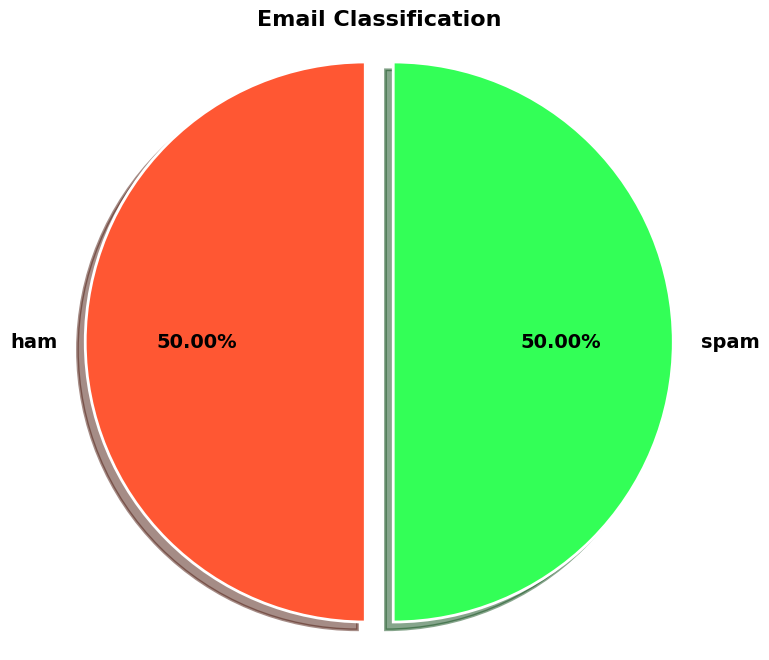

In [ ]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

## 2.3 Text Length and Structure Analysis

In [ ]:
df['num_characters'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1282.000000,1282.000000,1282.000000
mean,105.127145,22.731669,2.429797
std,60.247656,13.158841,1.663818
min,6.000000,2.000000,1.000000
25%,51.000000,12.000000,1.000000
50%,117.000000,24.000000,2.000000
75%,152.000000,31.000000,3.000000
max,790.000000,196.000000,18.000000


## 2.4 Summary Statistics for Legitimate Messages

In [ ]:
#ham
df[df['category'] == 'ham'][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,73.135725,17.795632,1.889236
std,65.505644,15.726283,1.657905
min,6.000000,2.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,790.000000,196.000000,18.000000


## 2.5 Summary Statistics for Spam Messages

In [ ]:
#spam
df[df['category'] == 'spam'][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


## 2.6 Character Length Distribution for Legitimate and Spam Messages

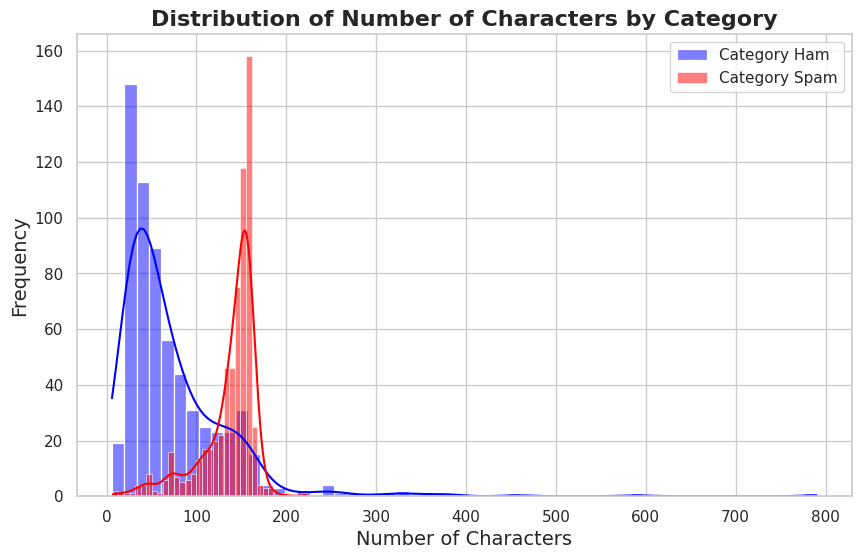

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for category ham in blue
sns.histplot(df[df['category'] == 'ham']['num_characters'], color='blue', label='Category Ham', kde=True)

# Plot the histogram for category spam in red
sns.histplot(df[df['category'] == 'spam']['num_characters'], color='red', label='Category Spam', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Category', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

## 2.7 Word Count Distribution for Legitimate and Spam Messages

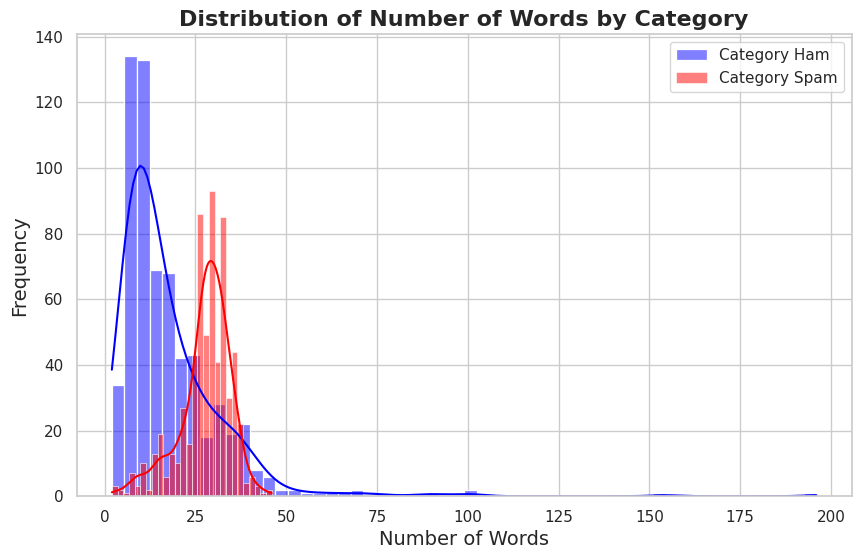

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for category ham in blue
sns.histplot(df[df['category'] == 'ham']['num_words'], color='blue', label='Category Ham', kde=True)

# Plot the histogram for category spam in red
sns.histplot(df[df['category'] == 'spam']['num_words'], color='red', label='Category Spam', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Category', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

# 3.Data Preprocessing

In [ ]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters and number
    y = []
    for i in text:
        if i.isalpha():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## 3.1 Creating a New Column: 'transformed_text'

In [ ]:
df['transformed_text'] = df['message'].apply(transform_text)

In [ ]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,category,message,num_characters,num_words,num_sentence,transformed_text
0,spam,December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update VCo FREE on 08002986906,158,30,4,decemb mobil entitl updat latest colour camera mobil free call mobil updat vco free
1,spam,"Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply. To stop texts, txt STOP to 80062",152,32,2,dear voucher holder claim week offer pc pleas go http ts cs appli stop text txt stop
2,spam,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records.",160,35,5,contract mobil mnth latest motorola nokia etc free doubl min text orang tariff text ye callback remov record
3,spam,What do U want for Xmas? How about 100 free text messages & a new video phone with half price line rental? Call free now on 0800 0721072 to find out more!,154,35,3,u want xma free text messag new video phone half price line rental call free find
4,spam,You are a winner U have been specially selected 2 receive £1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810,145,30,1,winner u special select receiv cash holiday flight inc speak live oper claim


## 3.2 Word Cloud for Spam Messages

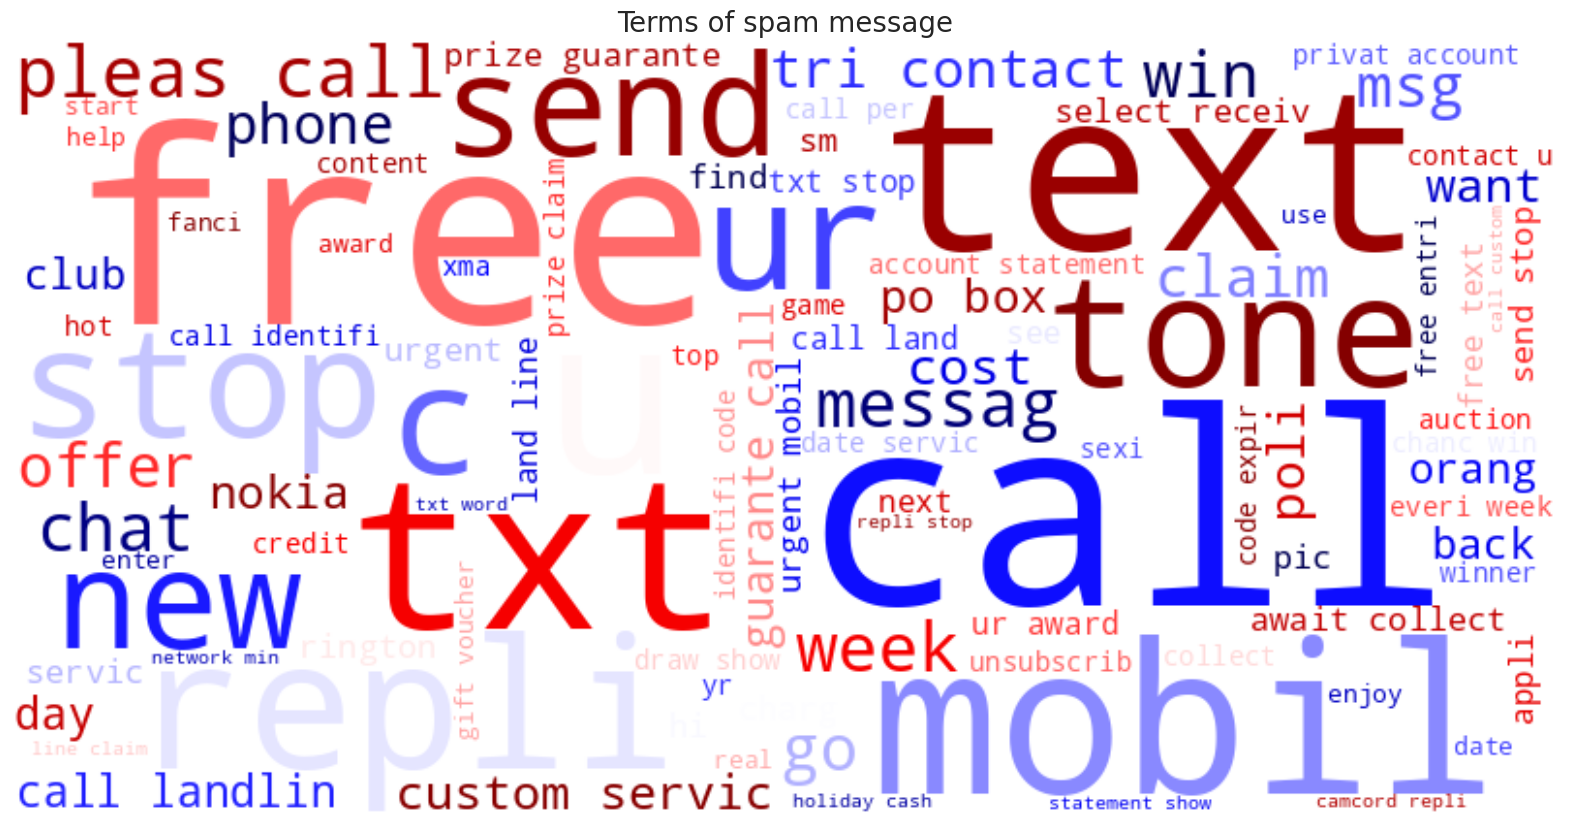

In [ ]:
plt.figure(figsize = (20,15))
wc = WordCloud(width=800,
            height=400,
            max_words=100,
            colormap= 'seismic',
            max_font_size=140,
            min_font_size = 2,
            random_state=8888,
            background_color='white')

spam_wc = wc.generate(df[df['category'] == 'spam']['transformed_text'].str.cat(sep = " "))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Terms of spam message', fontsize=20)
plt.axis('off')
plt.show()

## 3.3 Word Cloud for Ham Messages

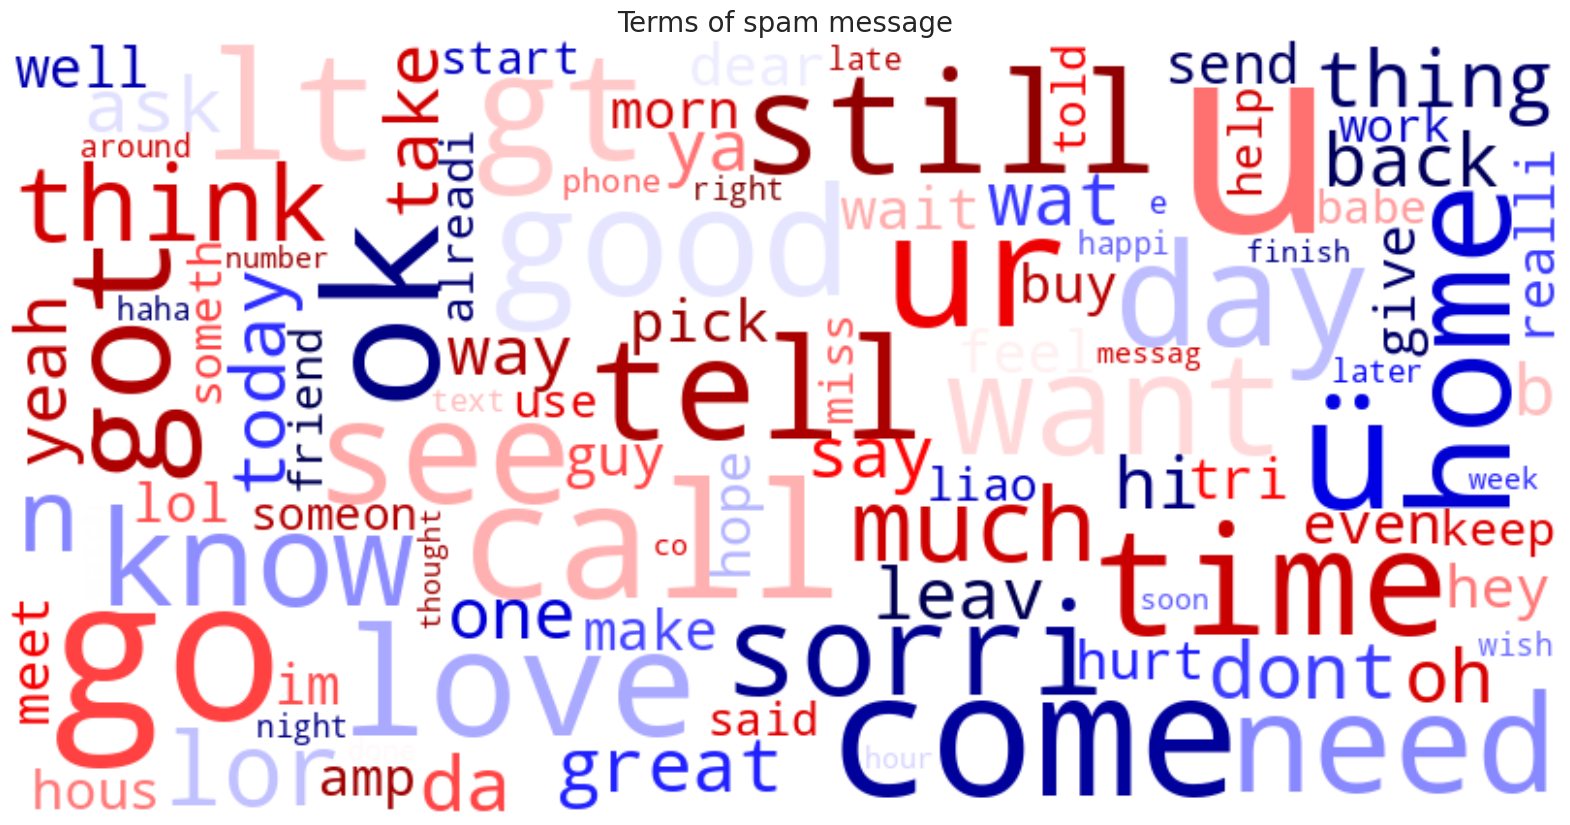

In [ ]:
plt.figure(figsize = (20,15))
ham_wc = wc.generate(df[df['category'] == 'ham']['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Terms of spam message', fontsize=20)
plt.axis('off')
plt.show()

## 3.4 Find top 30 words of spam

In [ ]:
spam_carpos = []
for sentence in df[df['category'] == 'spam']['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [ ]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

/tmp/ipython-input-46-2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


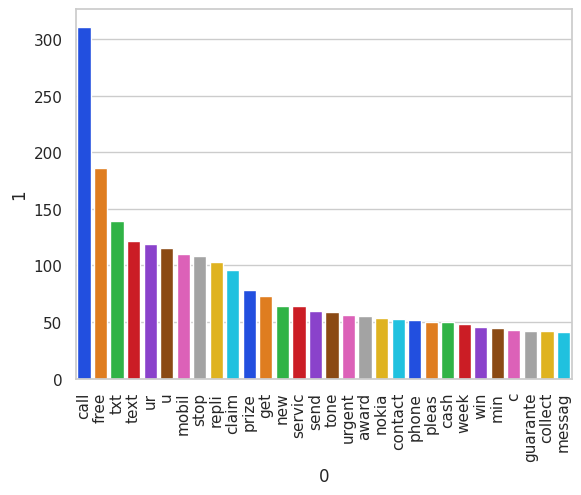

In [ ]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

## 3.5 Find top 30 words of ham

In [ ]:
ham_carpos = []
for sentence in df[df['category'] == 'ham']['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [ ]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

/tmp/ipython-input-52-699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


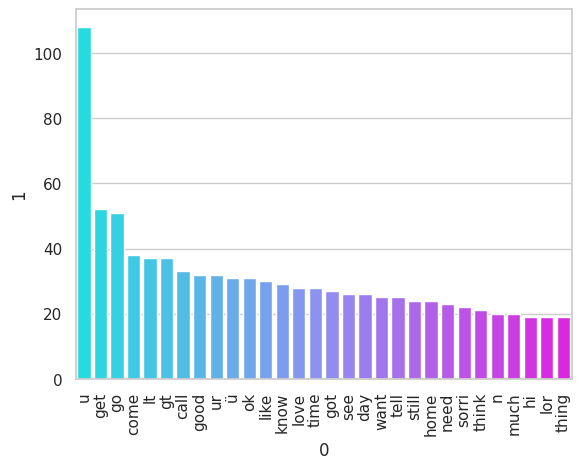

In [ ]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

# 4.Model Building

## 4.1 Initializing TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features = 3000)

## 4.2 Dependent and Independent Variable

In [ ]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['category'].values

## 4.3 Split into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

## 4.4 Import the Models

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## 4.5 Initialize the Models

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

## 4.6 Dictionary of the Models

In [ ]:
clfs = {
    'SVC': svc,
    'NB': mnb,
    'DT': dtc,
    'RF': rfc,
    'Adaboost': abc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

## 4.7 Train the Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# 5.Evaluate the Models

In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

# Encode labels temporarily
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

results = []

for name, clf in clfs.items():
    accuracy, precision, recall, f1 = train_classifier(clf, X_train, y_train_encoded, X_test, y_test_encoded)
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)


Model: SVC
Accuracy: 0.9494
Precision: 0.9500
Recall: 0.9494
F1 Score: 0.9494

Model: NB
Accuracy: 0.9222
Precision: 0.9240
Recall: 0.9222
F1 Score: 0.9222

Model: DT
Accuracy: 0.8911
Precision: 0.8941
Recall: 0.8911
F1 Score: 0.8906

Model: RF
Accuracy: 0.8911
Precision: 0.8995
Recall: 0.8911
F1 Score: 0.8908

Model: Adaboost
Accuracy: 0.8755
Precision: 0.8795
Recall: 0.8755
F1 Score: 0.8748

Model: ETC
Accuracy: 0.8949
Precision: 0.9043
Recall: 0.8949
F1 Score: 0.8947

Model: GBDT
Accuracy: 0.9105
Precision: 0.9110
Recall: 0.9105
F1 Score: 0.9104

Model: xgb
Accuracy: 0.9144
Precision: 0.9158
Recall: 0.9144
F1 Score: 0.9142


NOTE :

*   SVC : Support Vector Classifier (SVM)
*   NB : Naive Bayes
*   DT : Decision Tree
*   RF : Random Forest
*   Adaboost
*   ETC : Extra Trees
*   GBDT : Gradient Boosting
*   XGB

In [ ]:
print("\n=== All Model Performance ===")
print(results_df.sort_values(by='F1 Score', ascending=False))


=== All Model Performance ===
      Model  Accuracy  Precision    Recall  F1 Score
0       SVC  0.949416   0.950017  0.949416  0.949355
1        NB  0.922179   0.924023  0.922179  0.922207
7       xgb  0.914397   0.915790  0.914397  0.914199
6      GBDT  0.910506   0.910981  0.910506  0.910397
5       ETC  0.894942   0.904345  0.894942  0.894700
3        RF  0.891051   0.899456  0.891051  0.890843
2        DT  0.891051   0.894082  0.891051  0.890592
4  Adaboost  0.875486   0.879454  0.875486  0.874820


NOTE :

*   SVC : Support Vector Classifier (SVM)
*   NB : Naive Bayes
*   DT : Decision Tree
*   RF : Random Forest
*   Adaboost
*   ETC : Extra Trees
*   GBDT : Gradient Boosting
*   XGB

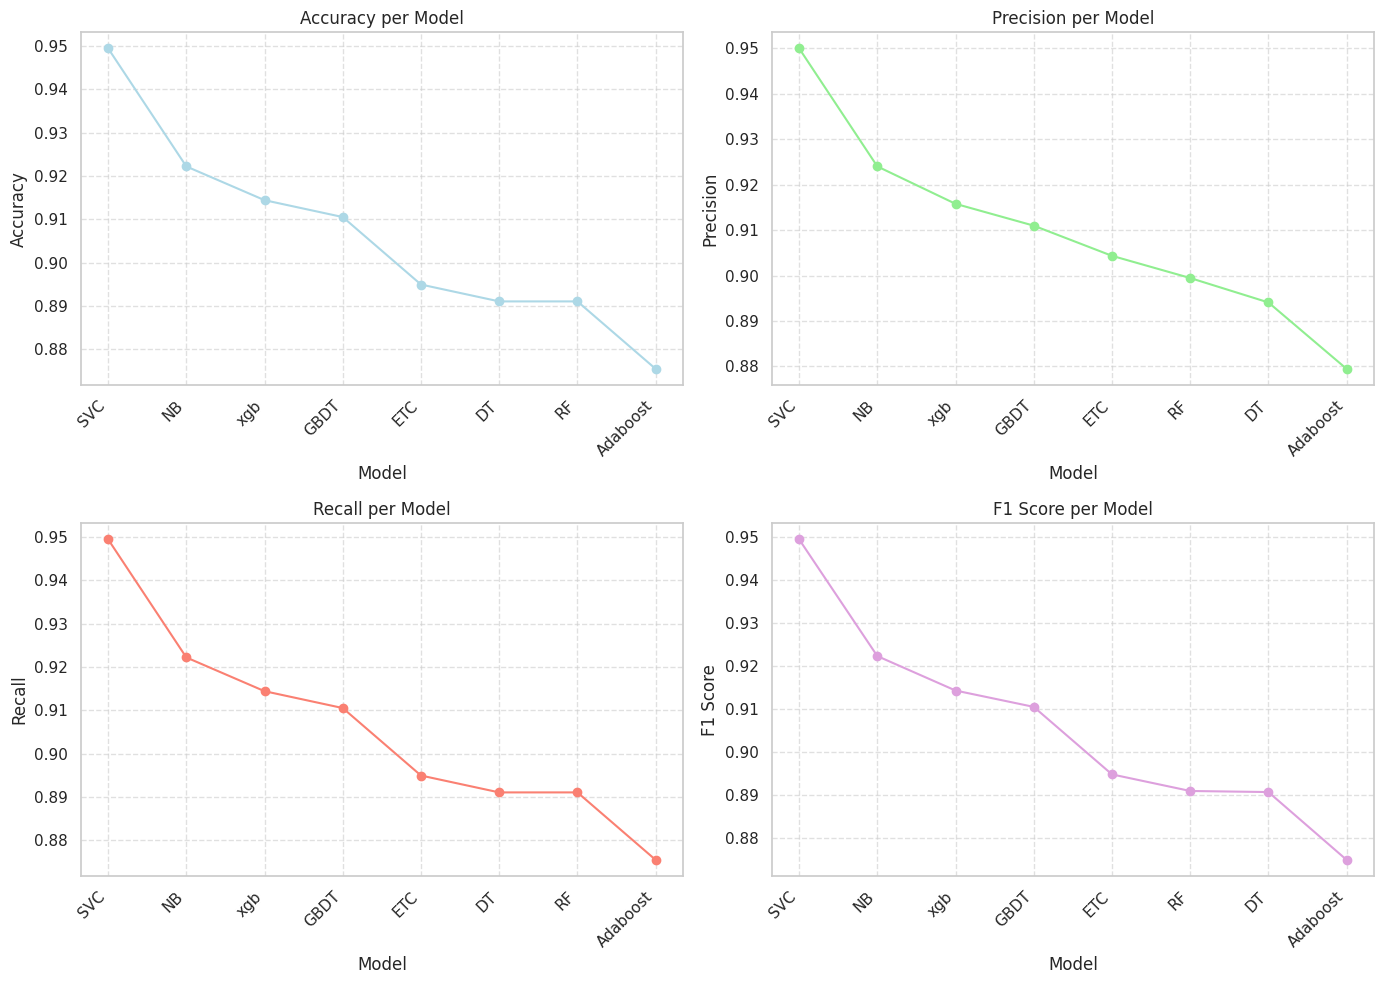

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# set index for data
results_df_plot = results_df.set_index('Model')

# Setup grid 2x2 for 4 metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['lightblue', 'lightgreen', 'salmon', 'plum']

# graphic plot for each metrics
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2

    # Sort metric value
    data = results_df_plot.sort_values(by=metric, ascending=False)[metric]

    # Plot line chart
    axes[row][col].plot(data.index, data.values, marker='o', color=colors[i])
    axes[row][col].set_title(f'{metric} per Model')
    axes[row][col].set_ylabel(metric)
    axes[row][col].set_xlabel('Model')
    axes[row][col].set_xticks(range(len(data.index)))
    axes[row][col].set_xticklabels(data.index, rotation=45, ha='right')
    axes[row][col].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

NOTE :

*   SVC : Support Vector Classifier (SVM)
*   NB : Naive Bayes
*   DT : Decision Tree
*   RF : Random Forest
*   Adaboost
*   ETC : Extra Trees
*   GBDT : Gradient Boosting
*   XGB

In [ ]:
import plotly.express as px
import pandas as pd

long_df = results_df_plot.reset_index().melt(id_vars='Model',
                                              value_vars=metrics,
                                              var_name='Metric',
                                              value_name='Score')

fig = px.bar(long_df, x='Model', y='Score', color='Metric',
             barmode='group', text=long_df['Score'].round(2),
             title="Interactive Comparison of Model Metrics")

fig.update_traces(textposition='outside')
fig.update_layout(yaxis=dict(range=[0, 1.05]),
                  legend_title_text='Metric',
                  xaxis_tickangle=-45)
fig.show()

NOTE :

*   SVC : Support Vector Classifier (SVM)
*   NB : Naive Bayes
*   DT : Decision Tree
*   RF : Random Forest
*   Adaboost
*   ETC : Extra Trees
*   GBDT : Gradient Boosting
*   XGB

# 6.Conclusion

Conclusion: In our evaluation of various classification algorithms, we observed the following key insights:


*   Support Vector Classifier (SVC) and Naive Bayes (NB) demonstrated the highest accuracy and F1-Score, both achieving approximately 93.50%.
*   Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.
*   Other models, including Gradient Boosting, Adaboost displayed competitive performance.


The selection of the optimal model should consider factors beyond just accuracy, such as computational efficiency and the specific requirements of the application. It is advisable to perform further model fine-tuning and validation before making a final choice.